In [1]:
import glob

import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

from oudelaar_tiled_capture_2019 import config

In [2]:
def open_seurat_csv(population):
    seurat_df = pd.read_csv(
        config.in_data_intermediate('cite-seq/.old/{}.csv'.format(population)),
        index_col=0
    )
    seurat_df = seurat_df.T
    seurat_df['population'] = population
    return seurat_df

In [3]:
all_data = pd.concat([open_seurat_csv(pop)
                      for pop in (
                          's0-low', 's0-med',
                          's1', 's2', 's3', 's4', 's5')])

In [4]:
all_data.loc[all_data.population.isin(['s4', 's5']), 'population'] = 's4/s5'

In [5]:
tpm_data = 1e6 * all_data.iloc[:,:-1].div(
    all_data.iloc[:,:-1].sum(axis=1), axis=0)

In [6]:
tpm_data['Hba'] = tpm_data['Hba-a1'] + tpm_data['Hba-a2']

In [7]:
tpm_data = pd.merge(
    tpm_data, all_data[['population']],
    left_index=True, right_index=True)

In [8]:
data_by_popn = tpm_data.groupby('population').mean().T.sort_index()

In [9]:
log1p_tpm_data = np.log1p(tpm_data.iloc[:,:-1])

In [10]:
log1p_tpm_data = pd.merge(log1p_tpm_data, tpm_data[['population']],
                          left_index=True, right_index=True)

In [20]:
[c for c in data_by_popn.index if 'Kit' in c]

['Kit', 'Kitl']

In [15]:
data_by_popn.loc['CITE_cKit']

KeyError: 'CITE_cKit'

In [12]:
median_by_popn = tpm_data.groupby('population').median().T.sort_index()

In [13]:
median_by_popn.loc['Hba']

population
s0-low      1846.478502
s0-med      2039.144228
s1          2653.960865
s2         21262.542916
s3        108110.124720
s4/s5     157112.393343
Name: Hba, dtype: float64

In [155]:
data_by_popn.to_csv('../../data/processed/cite-seq_mean_tpm_by_popn.csv')

([<matplotlib.axis.YTick at 0x7efc13b15820>,
 [Text(0, 6.90875477931522, '1000'),
  Text(0, 8.006700845440367, '3000'),
  Text(0, 9.210440366976517, '10000'),
  Text(0, 10.308985993422082, '30000'),
  Text(0, 11.51293546492023, '100000'),
  Text(0, 12.611541086966115, '300000')])

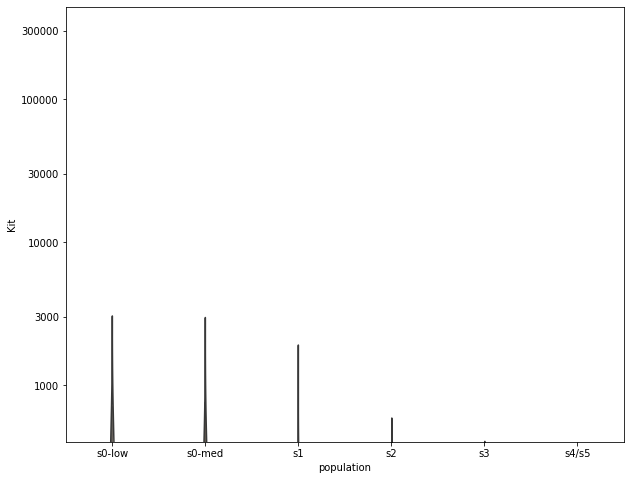

In [21]:
plt.figure(figsize=(10,8))
sb.violinplot(x='population', y='Hba', data=log1p_tpm_data, palette='OrRd')
plt.ylim(6,13)
ticks = [1000, 3000, 10000, 30000, 100000, 300000]
plt.yticks(np.log1p(ticks), ticks)
#plt.savefig('../../out/figures/alpha-expression.eps')

<AxesSubplot:xlabel='population', ylabel='Kit'>

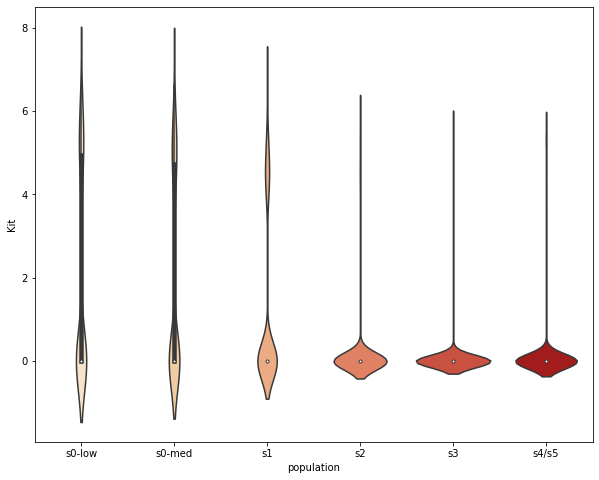

In [22]:
plt.figure(figsize=(10,8))
sb.violinplot(x='population', y='Kit', data=log1p_tpm_data, palette='OrRd')
#plt.ylim(6,13)
#ticks = [1000, 3000, 10000, 30000, 100000, 300000]
#plt.yticks(np.log1p(ticks), ticks)
#plt.savefig('../../out/figures/alpha-expression.eps')

([<matplotlib.axis.YTick at 0x7f08fd675128>,
 <a list of 8 Text yticklabel objects>)

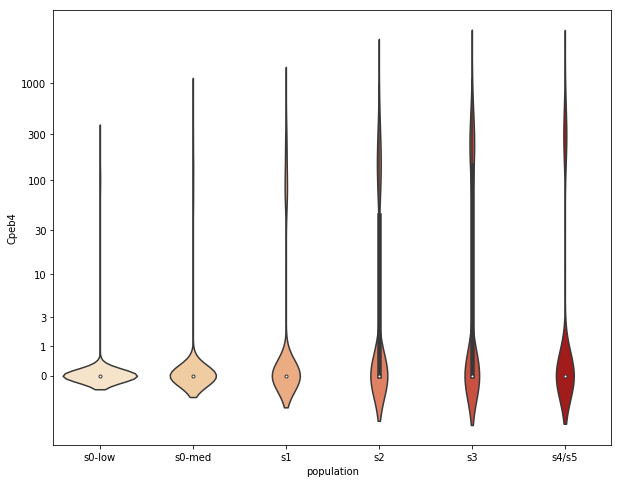

In [124]:
plt.figure(figsize=(10,8))
sb.violinplot(x='population', y='Cpeb4', data=log1p_tpm_data, palette='OrRd')
ticks = [0, 1, 3, 10, 30, 100, 300, 1000]
plt.yticks(np.log1p(ticks), ticks)
#plt.savefig('../../out/figures/cpeb4-vln.eps')

Text(0, 0.5, 'Mean Cpeb4 expression (tpm)')

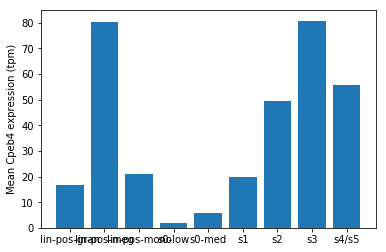

In [145]:
cpeb4_tpms = data_by_popn.loc['Cpeb4']
plt.bar(range(len(cpeb4_tpms)), cpeb4_tpms)
plt.xticks(range(len(cpeb4_tpms)), cpeb4_tpms.index)
plt.ylabel('Mean Cpeb4 expression (tpm)')
#plt.savefig('../../out/figures/cpeb4-bar.eps')